# [Daily Dose of Data Science](https://avichawla.substack.com)

Author: Avi Chawla

The notebook accompanies the code for [The Most Underrated and Underutilized Features of Matplotlib](https://www.blog.dailydoseofds.com/p/the-most-underrated-and-underutilized)

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

## Dummy Data

In [2]:
df = pd.DataFrame([['Clothing', 0.1],
                   ['Home Decor', 0.43],
                   ['Electronics', 0.13],
                   ['Stationery', 0.2],
                   ['Toys', 0.14]], columns = ['Spend_Category', 'Profit_Margin'])

df

Spend_Category  Profit_Margin
0       Clothing           0.10
1     Home Decor           0.43
2    Electronics           0.13
3     Stationery           0.20
4           Toys           0.14

## Basic Matplotlib Chart

In [3]:
def percent_formatter(x, pos):
    return f"{x*100:.0f}%"

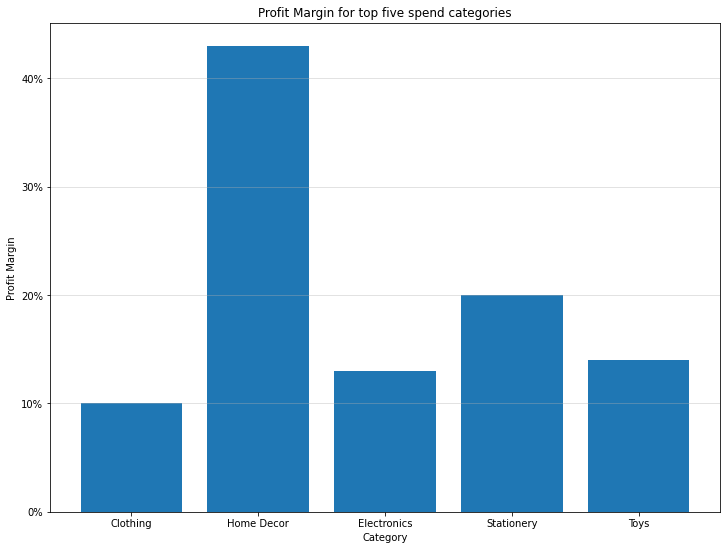

In [4]:
# Define figure
fig,ax = plt.subplots(figsize = (12,9))

# Create bar plot
plt.bar(df['Spend_Category'], df['Profit_Margin'])

# Convert y-axis labels to percentage
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))

# show grid
plt.grid(axis = 'y',alpha = 0.45)

# set title and and x-y label 
plt.title('Profit Margin for top five spend categories')
plt.ylabel('Profit Margin')
plt.xlabel('Category')

plt.show()

## Matplotlib + Little Extra Effort

In [5]:
## sort the dataframe
df = df.sort_values("Profit_Margin", ascending=True, ignore_index = True)
df

Spend_Category  Profit_Margin
0       Clothing           0.10
1    Electronics           0.13
2           Toys           0.14
3     Stationery           0.20
4     Home Decor           0.43

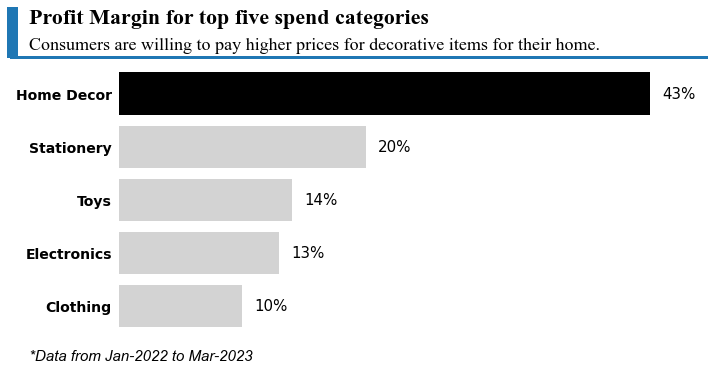

In [6]:
# Define figure
fig,ax = plt.subplots(figsize = (10,6))

# add title to plot
title = 'Profit Margin for top five spend categories'
plt.text(s=title,                      # the text to be displayed
         x = 0,y = 0.91,               # the position of the text (x, y)
         fontname = 'Times New Roman', # the font to be used for the text
         fontweight = "bold",          # the weight of the font (e.g. bold)
         fontsize = 22,                # the size of the font
         ha='left',                    # horizontal alignment of the text ('left', 'center', 'right')
         transform = fig.transFigure   # the coordinate system to use for positioning the text
)

# add subtitle to plot
subtitle = 'Consumers are willing to pay higher prices for decorative items for their home.'
plt.text(s=subtitle,                   # the text to be displayed
         x = 0, y = 0.85,              # the position of the text (x, y)
         fontname = 'Times New Roman', # the font to be used for the text
         fontsize = 18,                # the size of the font
         ha = 'left',                  # horizontal alignment of the text ('left', 'center', 'right')
         transform = fig.transFigure   # the coordinate system to use for positioning the text
)

# Create bar plot
bars = plt.barh(df['Spend_Category'], 
                df['Profit_Margin'], 
                color = ['lightgray', 'lightgray', 'lightgray', 'lightgray', "black"], # color for bars
                edgecolor='none')

# add margin
plt.margins(y=0.14)

# remove plot borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# remove xlabels
ax.set_xticklabels([])
ax.set_xticks([])

# position and format ylabels
ax.tick_params(axis='y', left=False)
plt.yticks(fontsize=14, fontweight='bold')

plt.bar_label(
    bars,                                          # the bars object to add labels to
    labels=[f'{x:.0%}' for x in bars.datavalues],  # the list of labels to display on each bar
    padding=12,                                    # padding between the bar and the label
    fontsize=15                                    # font size of the labels
)

# add line
ax.plot(
    [-0.025, .94],                # X-coordinates of the ends of the line
    [.8335, .8335],               # Y-coordinates of the ends of the line
    transform = fig.transFigure,  # Coordinate system for the line
    clip_on = False,              # Whether to clip the line to the axes bounds
    color = 'tab:blue',           # Color of the line
    linewidth = 3                 # Width of the line
)


# add rectangle
ax.add_patch(
    plt.Rectangle(
        (-0.03,.95),                   # (x, y) location of the bottom-left corner of the rectangle
        0.015,                         # width of the rectangle
        -0.12,                         # height of the rectangle
        facecolor = 'tab:blue',        # fill color of the rectangle
        transform = fig.transFigure,   # coordinate system used for the rectangle
        clip_on = False,               # whether the rectangle is drawn outside the plot area
        linewidth = 0                  # width of the edge line of the rectangle
    )
)

# add footnote
footnote = "*Data from Jan-2022 to Mar-2023"
plt.text(s = footnote,
         x = 0,
         y = 0.13,
         fontname = 'Arial',
         fontstyle = 'italic',
         fontsize = 15,
         ha = 'left',
         transform = fig.transFigure
);